## Homework #16 - Class Balancing

### Overview:
In Machine Learning, Class Balancing means balancing a Data Set
where the number of classes is unbalanced. Avoiding Class Imbalance is
essential before using a machine learning algorithm because our end goal
is to train a machine learning model that generalizes well for all possible classes assuming we have a binary dataset with an equal number of
samples.

### Task:
For this chapter, you will have to do the following:
* Using Class Balancing, try the algorithms you discovered and apply
them to the proposed Data Sets

In [206]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.datasets import fetch_datasets
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.decomposition import PCA

In [207]:
pokemon_df: pd.DataFrame = pd.read_csv(filepath_or_buffer="dataset/Pokemon.csv")

# data = fetch_datasets()['satimage']
# X, y = data.data, data.target
#
# # Convert to DataFrame
# pokemon_df = pd.DataFrame(X)
# pokemon_df['target'] = y

In [208]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [209]:
pokemon_df.tail(n=10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [210]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [211]:
print(pokemon_df.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [212]:
object_columns = pokemon_df.select_dtypes(include=['object']).columns
print(f'Object Columns: {object_columns.to_list()}')
for column_name in object_columns:
    print(f"Column Name = {column_name}: Unique Values = {pokemon_df[column_name].unique()}")

Object Columns: ['Name', 'Type 1', 'Type 2']
Column Name = Name: Unique Values = ['Bulbasaur' 'Ivysaur' 'Venusaur' 'VenusaurMega Venusaur' 'Charmander'
 'Charmeleon' 'Charizard' 'CharizardMega Charizard X'
 'CharizardMega Charizard Y' 'Squirtle' 'Wartortle' 'Blastoise'
 'BlastoiseMega Blastoise' 'Caterpie' 'Metapod' 'Butterfree' 'Weedle'
 'Kakuna' 'Beedrill' 'BeedrillMega Beedrill' 'Pidgey' 'Pidgeotto'
 'Pidgeot' 'PidgeotMega Pidgeot' 'Rattata' 'Raticate' 'Spearow' 'Fearow'
 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew' 'Sandslash' 'Nidoran♀'
 'Nidorina' 'Nidoqueen' 'Nidoran♂' 'Nidorino' 'Nidoking' 'Clefairy'
 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat'
 'Golbat' 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect' 'Venonat'
 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck' 'Golduck'
 'Mankey' 'Primeape' 'Growlithe' 'Arcanine' 'Poliwag' 'Poliwhirl'
 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'AlakazamMega Alakazam' 'Machop'
 'Machoke' 'Machamp' 'Bellsprout' 'W

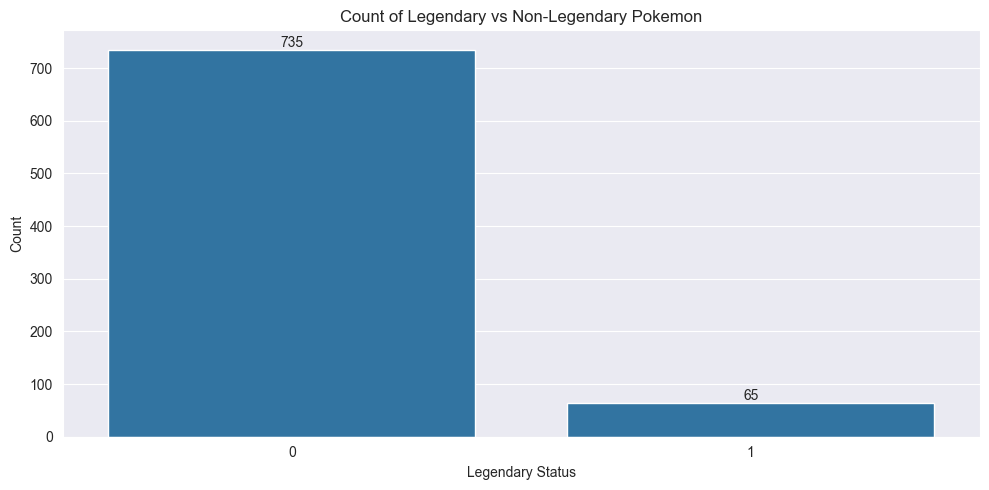

In [213]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=pokemon_df.Legendary.astype(int), ax=ax)

# sns.countplot(x=pokemon_df['target'], ax=ax)

ax.bar_label(ax.containers[0])
ax.set_title('Count of Legendary vs Non-Legendary Pokemon')
ax.set_xlabel('Legendary Status')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [214]:
column_transformer = ColumnTransformer(
    transformers=[
        ("drop", "drop", ["#", "Name"]),
        ("impute_and_encode_Type_2_pipeline", Pipeline(
            steps=[
                ("impute", SimpleImputer(strategy='constant', fill_value='None')),
                ("one_hot_encode_type_1_multiclass", OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist')),
                # ("encode", TargetEncoder())
            ]
        ), ['Type 2']),
        ("one_hot_encode_type_2_multiclass", OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist'), ['Type 1']),
        # ("encode", TargetEncoder(), ['Type 1']),

        # ('scale', StandardScaler(), [col for col in pokemon_df.columns if col not in ['Type 1', 'Type 2', 'Name', '#', 'Legendary']])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
).set_output(transform='pandas')

In [215]:
def create_pipeline(sampler=None, pca=False, model=None) -> Pipeline:
    pipeline = Pipeline(
        steps=[
            ('transform', column_transformer),
        ]
    )
    
    # if pca:
    #     pipeline.steps.append(('pca', PCA(n_components=2)))

    if sampler is not None:
        pipeline.steps.append(('sampler', sampler))

    # if pca:
    #     pipeline.steps.append(('pca', PCA(n_components=2)))
    
    if model is not None:
        pipeline.steps.append(('model', model))

    return pipeline

In [216]:
X_features, y_target = pokemon_df.drop(columns=['Legendary']), pokemon_df['Legendary']

# X_features, y_target = pokemon_df.drop(columns=['target']), pokemon_df['target']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, random_state=60, test_size=.2)

In [218]:
X_train

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
276,255,Torchic,Fire,NaN,310,45,60,40,70,50,45,3
484,436,Bronzor,Steel,Psychic,300,57,24,86,24,86,23,4
565,506,Lillipup,Normal,NaN,275,45,60,45,25,45,55,5
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6
737,669,Flabébé,Fairy,NaN,303,44,38,39,61,79,42,6
...,...,...,...,...,...,...,...,...,...,...,...,...
399,364,Sealeo,Ice,Water,410,90,60,70,75,70,45,3
394,360,Wynaut,Psychic,NaN,260,95,23,48,23,48,23,3
582,523,Zebstrika,Electric,NaN,497,75,100,63,80,63,116,5
65,60,Poliwag,Water,NaN,300,40,50,40,40,40,90,1


In [219]:
y_train

276    False
484    False
565    False
785    False
737    False
       ...  
399    False
394    False
582    False
65     False
205    False
Name: Legendary, Length: 640, dtype: bool

In [220]:
y_train_numeric = y_train.astype(int)
y_train_numeric

276    0
484    0
565    0
785    0
737    0
      ..
399    0
394    0
582    0
65     0
205    0
Name: Legendary, Length: 640, dtype: int64

In [221]:
y_test

664    False
778    False
258    False
474    False
796     True
       ...  
215    False
413    False
718    False
71     False
542     True
Name: Legendary, Length: 160, dtype: bool

In [222]:
y_test_numeric = y_test.astype(int)
y_test_numeric

664    0
778    0
258    0
474    0
796    1
      ..
215    0
413    0
718    0
71     0
542    1
Name: Legendary, Length: 160, dtype: int64

### Visualization - Full Dataset

In [223]:
pca = PCA(n_components=2)

In [224]:
pipeline = create_pipeline(model=pca)

In [225]:
X_pca = pipeline.fit_transform(X=pd.concat([X_train, X_test], axis=0), y=pd.concat([y_train_numeric, y_test_numeric], axis=0))

In [226]:
X_pca

array([[-133.90067274,  -15.16294528],
       [-147.57335495,   51.28717662],
       [-173.50181121,   -0.92883874],
       ...,
       [-131.76491789,   14.39847741],
       [ 168.11814402,  -91.49834111],
       [ 178.92951477,    2.78935623]], shape=(800, 2))

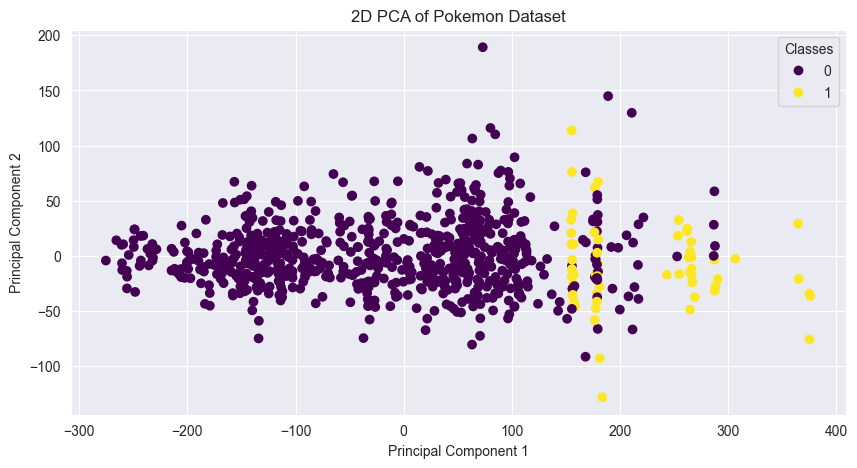

In [227]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.concat([y_train_numeric, y_test_numeric], axis=0), cmap='viridis', label=pd.concat([y_train_numeric, y_test_numeric], axis=0))

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset')

plt.show()

### Baseline Performance

In [228]:
logistic_regression = RandomForestClassifier()

In [229]:
pipeline = create_pipeline(pca=False, model=logistic_regression)

In [230]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('model', RandomForestClassifier())])

In [231]:
y_hat = pipeline.predict(X=X_test)

In [232]:
print(f'Logistic Regression - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Accuracy Score: 0.93125
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       148
           1       0.54      0.58      0.56        12

    accuracy                           0.93       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.93      0.93      0.93       160



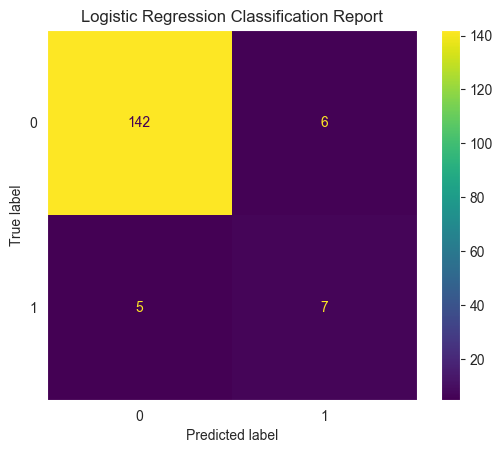

In [233]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report')
plt.grid(False)
plt.show()

# Undersampling
One way of handling imbalanced datasets is to reduce the number of observations from all classes but the minority one. There are 2 main groups of Undersampling Techniques:

#### A. Prototype Generation Methods
Given an original data set $S$, prototype generation algorithms will generate a new set $S^{\prime}$ where $|S^{\prime}| < |S|$ and $S^{\prime} \not\subset S$. In other words,
prototype generation techniques will reduce the number of samples in the targeted classes but the remaining samples are generated — and not selected — from the original set.

Example:
1. **Cluster Centroids**. It makes use of K-means to reduce the number of samples. Therefore, each class will be synthesized with the centroids of the K-means method instead of the
original samples.
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_under_sampling_001.png"
        alt="Picture"
        width="600"
        height="600"
        style="display: block; margin: 0 auto" />

#### B. Prototype Selection Methods
Prototype selection algorithms will select samples from the original set $S$, generating a dataset $S^{\prime}$, where $|S^{\prime}| < |S|$ and $S^{\prime} \subset S$. In other words
$S^{\prime}$ is a subset of $S$.

Prototype Selection Algorithms can be divided into two groups:
##### 1. Controlled Undersampling Techniques
Controlled under-sampling methods reduce the number of observations in the majority class or classes to an arbitrary number of samples specified by the user. Typically, they reduce the
number of observations to the number of samples observed in the minority class.

Examples:
1. **Random Undersampling**. It randomly deletes the rows of the majority class(es) according to the specified sampling strategy.
2. **Near Miss**. It adds some heuristic rules to select samples based on the distance between instances. There are three types of heuristic that can be selected:
    1. **NearMiss-1**: Selects majority class samples with the smallest average distance to the closest minority class samples.
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_nearmiss_001.png"
        alt="Picture"
        width="400"
        height="600"
        style="display: block; margin: 0 auto" />
    2. **NearMiss-2**: Selects majority class samples with the smallest average distance to the farthest minority class samples.
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_nearmiss_002.png"
        alt="Picture"
        width="400"
        height="600"
        style="display: block; margin: 0 auto" />
    3. **NearMiss-3**: For each minority class sample, selects a given number of closest majority class samples.
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_nearmiss_003.png"
        alt="Picture"
        width="400"
        height="600"
        style="display: block; margin: 0 auto" />


##### 2. Cleaning Undersampling Techniques
Cleaning under-sampling methods “clean” the feature space by removing either “noisy” observations or observations that are “too easy to classify”, depending on the method. The final
number of observations in each targeted class varies with the cleaning method and cannot be specified by the user.

Examples:
1. **Tomek Links**. A Tomek’s link exists when two samples from different classes are closest neighbors to each other. Mathematically, a Tomek’s link between two samples from different
classes $x$ and $y$ is defined such that for any sample $z$:
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_tomek_links_001.png"
        alt="Picture"
        width="400"
        height="600"
        style="display: block; margin: 0 auto" />

$$
\begin{gather*}
d(x,y) < d(x,z) \text{ and } d(x,y) < d(y, z) \\
d(...) \text{ - distance between two samples}
\end{gather*}
$$

2. **Edited Nearest Neighbors**. It uses K-Nearest Neighbors to identify the neighbors of the targeted class samples, and then removes observations if any or most of their neighbors are
from a different class. It carries out the following steps:
    1. Train a K-Nearest neighbors algorithm using the entire dataset.
    2. Find each observation's K closest neighbors (only for the targeted classes).
    3. Remove observations if any or most of its neighbors belong to a different class.
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_under_sampling_004.png"
        alt="Picture"
        width="600"
        height="600"
        style="display: block; margin: 0 auto" />
3. **etc**.

### Random Undersampling

In [234]:
random_under_sampler = RandomUnderSampler(random_state=42)

In [235]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [236]:
X_train_resampled, y_train_resampled = random_under_sampler.fit_resample(X=X_train_transformed, y=y_train_numeric)

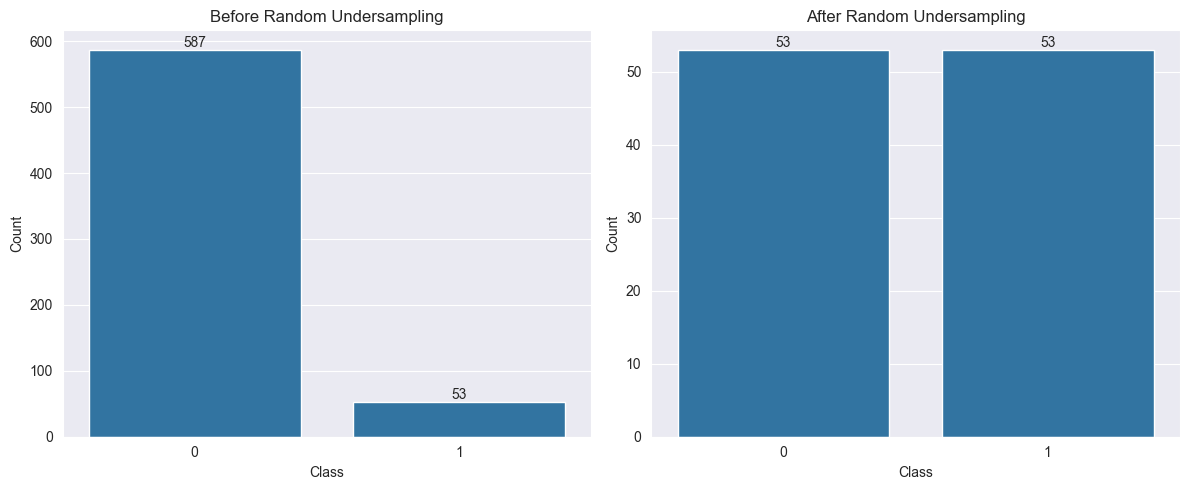

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Random Undersampling")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Random Undersampling")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using Random Undersampling

In [238]:
pca = PCA(n_components=2)

In [239]:
pipeline = create_pipeline(sampler=random_under_sampler, model=pca)

In [240]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [241]:
X_pca

array([[-2.99458962e+02, -2.80251175e+01],
       [-8.96382482e+01,  2.28342143e+01],
       [-1.15734420e+02,  4.25714868e+01],
       [-5.22278845e+01,  3.05829778e+01],
       [-7.33304285e+01,  5.06957352e+01],
       [-4.06063960e+01, -4.36417937e+01],
       [ 7.78603253e+01, -1.65405834e+01],
       [-1.82839062e+02, -1.70264080e+01],
       [-2.17790461e+01, -4.75693360e+00],
       [-2.98589649e+01, -3.05368005e+01],
       [-3.22819837e+01, -1.70693891e+01],
       [-2.74282488e+02,  1.17717963e+01],
       [-1.81336822e+02,  1.26891718e+00],
       [ 3.55416152e+01, -4.56416989e+01],
       [-9.59931586e+01, -1.86942776e+01],
       [-1.36459429e+02, -4.33058984e+01],
       [-2.45404996e+02,  5.87248262e+01],
       [ 7.39837994e+01,  1.59570637e+01],
       [-2.36720486e+02, -8.10260917e+00],
       [-2.41104185e+02, -6.62649601e+00],
       [-2.38615728e+02,  1.62057058e+01],
       [-1.20786437e+02, -1.08241566e+01],
       [-2.76411715e+02, -8.61046814e+00],
       [-6.

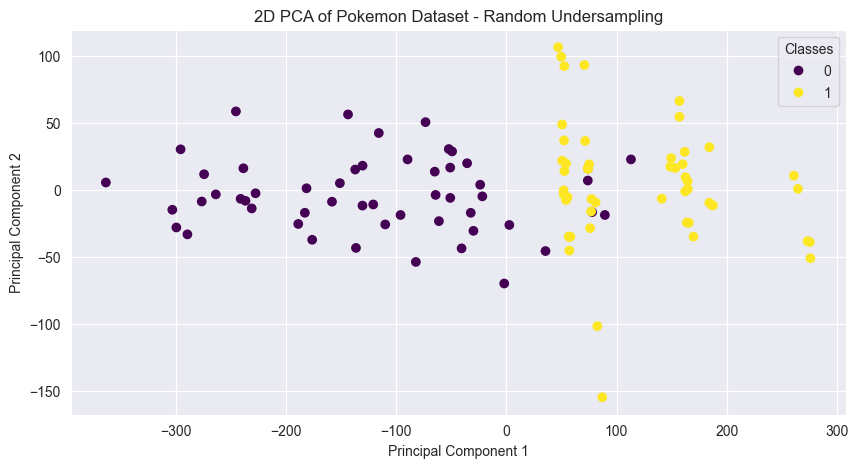

In [242]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Random Undersampling')

plt.show()

#### Logistic Regression with Undersampled Dataset - Random Undersampling

In [243]:
random_under_sampler = RandomUnderSampler(random_state=42)

In [244]:
logistic_regression = RandomForestClassifier()

In [245]:
pipeline = create_pipeline(sampler=random_under_sampler, pca=False, model=logistic_regression)

In [246]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('model', RandomForestClassifier())])

In [247]:
y_hat = pipeline.predict(X=X_test)

In [248]:
print(f'Logistic Regression - Random Undersampling - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Random Undersampling - Accuracy Score: 0.8875
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       148
           1       0.39      0.92      0.55        12

    accuracy                           0.89       160
   macro avg       0.69      0.90      0.74       160
weighted avg       0.95      0.89      0.91       160



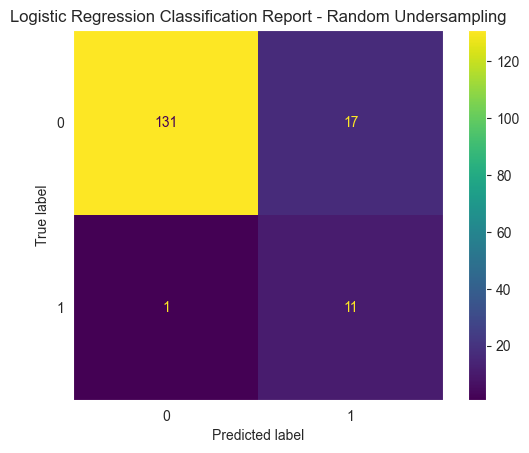

In [249]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Random Undersampling')
plt.grid(False)
plt.show()

## Near Miss
### Near Miss - Version 1

In [250]:
near_miss_1 = NearMiss(version=1)

In [251]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [252]:
X_train_resampled, y_train_resampled = near_miss_1.fit_resample(X=X_train_transformed, y=y_train_numeric)

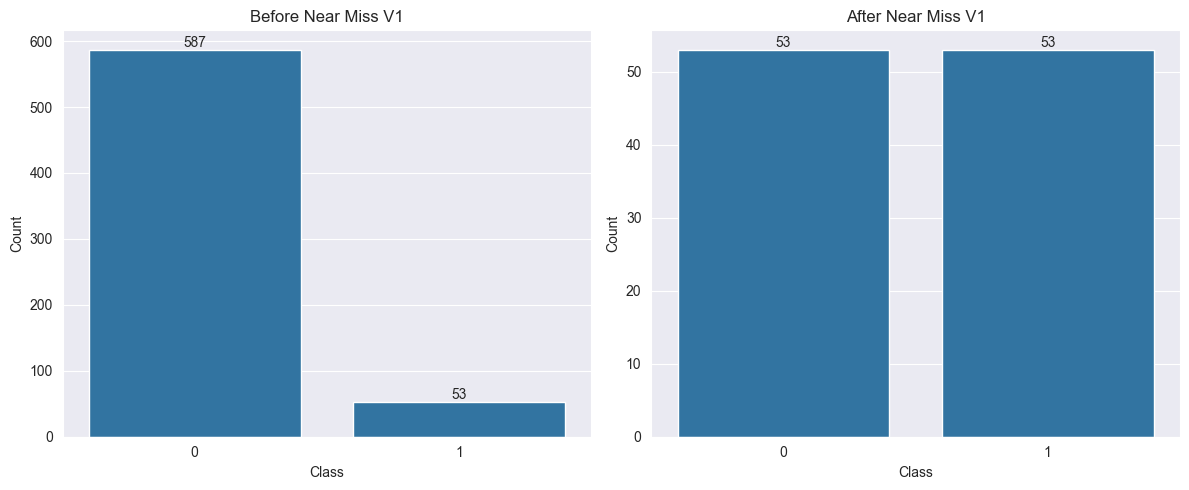

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Near Miss V1")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Near Miss V1")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using Near Miss Version 1 Undersampling

In [254]:
pca = PCA(n_components=2)

In [255]:
pipeline = create_pipeline(sampler=near_miss_1, model=pca)

In [256]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [257]:
X_pca

array([[ -11.96481169,   15.78112189],
       [ -11.95774787,   15.79028952],
       [ -33.64444735,   -2.2691889 ],
       [ -33.64444735,   -2.2691889 ],
       [ -36.87912892,  -51.60804991],
       [  -9.41065739,  -15.95473808],
       [  -4.00439897,  -22.94809241],
       [  -9.09658875,    2.5794462 ],
       [ 104.73001251,    2.10899383],
       [  -5.05095363,    6.01365247],
       [ -44.24489706,  -48.11317762],
       [ -22.92717405,   22.10541636],
       [  -6.24226575,   -9.06515641],
       [ -55.28233974,  -13.84250995],
       [ -11.17229278,  -12.45166363],
       [ -37.0774405 ,  -65.24720489],
       [ -38.91650846,  -29.30759771],
       [  -4.97014931,   23.56805501],
       [ -69.26114972,  -16.81666404],
       [ -74.08983168,    8.8055131 ],
       [  31.16702172,  -12.02995686],
       [ -80.45383993,  -12.07865374],
       [ -80.4571901 ,  -12.08158919],
       [ -77.82999131,  -31.6559    ],
       [  32.90190064,   23.88113582],
       [ -76.70276329,   

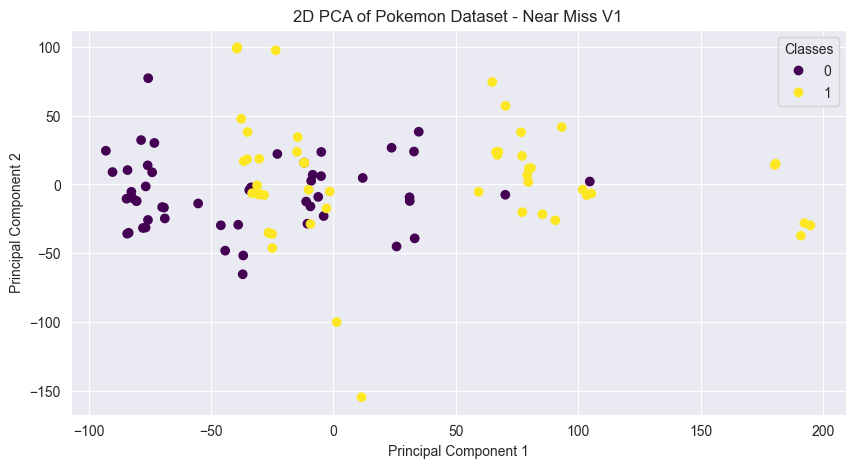

In [258]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Near Miss V1')

plt.show()

#### Logistic Regression with Undersampled Dataset - Near Miss Version 1 Undersampling

In [259]:
near_miss_1 = NearMiss(version=1)

In [260]:
logistic_regression = RandomForestClassifier()

In [261]:
pipeline = create_pipeline(sampler=near_miss_1, pca=False, model=logistic_regression)

In [262]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', NearMiss()), ('model', RandomForestClassifier())])

In [263]:
y_hat = pipeline.predict(X=X_test)

In [264]:
print(f'Logistic Regression - Near Miss V1 - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Near Miss V1 - Accuracy Score: 0.90625
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       148
           1       0.43      0.83      0.57        12

    accuracy                           0.91       160
   macro avg       0.71      0.87      0.76       160
weighted avg       0.94      0.91      0.92       160



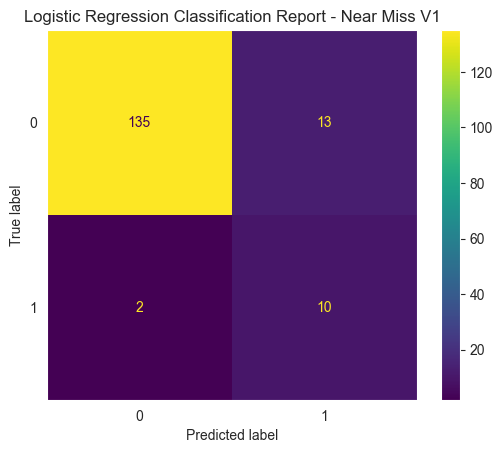

In [265]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Near Miss V1')
plt.grid(False)
plt.show()

### Near Miss - Version 2

In [266]:
near_miss_2 = NearMiss(version=2)

In [267]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [268]:
X_train_resampled, y_train_resampled = near_miss_2.fit_resample(X=X_train_transformed, y=y_train_numeric)

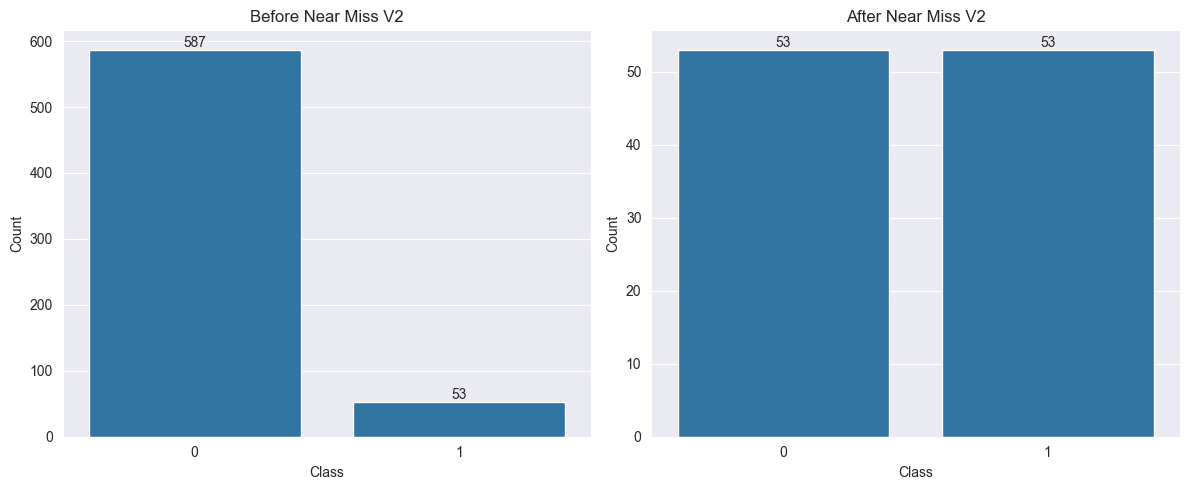

In [269]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Near Miss V2")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Near Miss V2")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using Near Miss Version 2 Undersampling

In [270]:
pca = PCA(n_components=2)

In [271]:
near_miss_2 = NearMiss(version=2)
pipeline = create_pipeline(sampler=near_miss_2, model=pca)

In [272]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [273]:
X_pca

array([[  26.07858593,   -6.15497083],
       [  26.91608593,  -32.25345049],
       [  26.17666802,  -25.99605863],
       [  19.27443055,  -39.92558954],
       [  29.25711657,   31.96331869],
       [  20.32862571,   20.98681952],
       [ 100.15720394,    9.10573238],
       [  65.6593227 ,    2.91418348],
       [  31.41520629,   47.31663242],
       [  -9.44255737,  -17.61185233],
       [ -11.29694532,   -7.58518735],
       [   6.78673965,   18.75224047],
       [  -9.37071802,   11.98537208],
       [ -14.57348854,  -23.84070384],
       [   5.1264474 ,    7.38983865],
       [  -2.94961129,   -6.70024583],
       [ -15.81661335,   14.226477  ],
       [ -15.8253005 ,   14.21638587],
       [  -8.40864695,   31.97562357],
       [ -13.57510071,   11.09665353],
       [ -16.47187886,   -3.74832969],
       [  -8.40712926,   21.53848381],
       [ -16.31605379,  -47.14366817],
       [ -13.38673525,   26.57083207],
       [ -26.77390079,   31.36619483],
       [ -38.03044431,  -

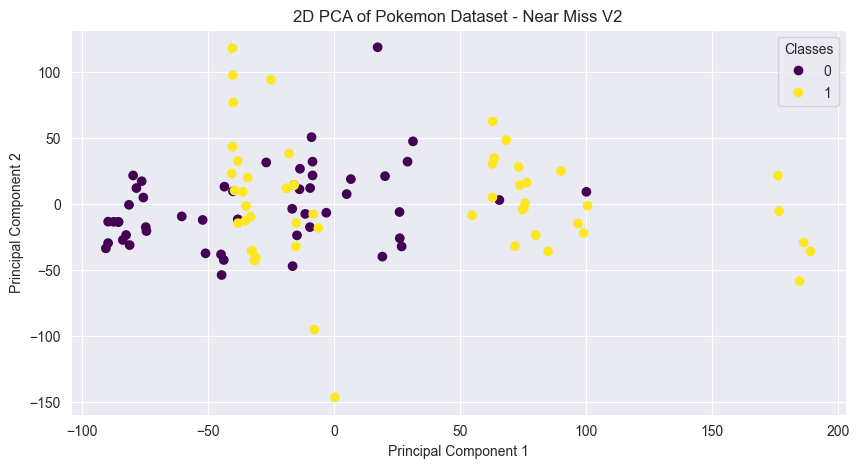

In [274]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Near Miss V2')

plt.show()

#### Logistic Regression with Undersampled Dataset - Near Miss Version 2 Undersampling

In [275]:
near_miss_2 = NearMiss(version=2)

In [276]:
logistic_regression = RandomForestClassifier()

In [277]:
pipeline = create_pipeline(sampler=near_miss_2, pca=False, model=logistic_regression)

In [278]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', NearMiss(version=2)),
                ('model', RandomForestClassifier())])

In [279]:
y_hat = pipeline.predict(X=X_test)

In [280]:
print(f'Logistic Regression - Near Miss V2 - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Near Miss V2 - Accuracy Score: 0.9125
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       148
           1       0.45      0.83      0.59        12

    accuracy                           0.91       160
   macro avg       0.72      0.88      0.77       160
weighted avg       0.95      0.91      0.92       160



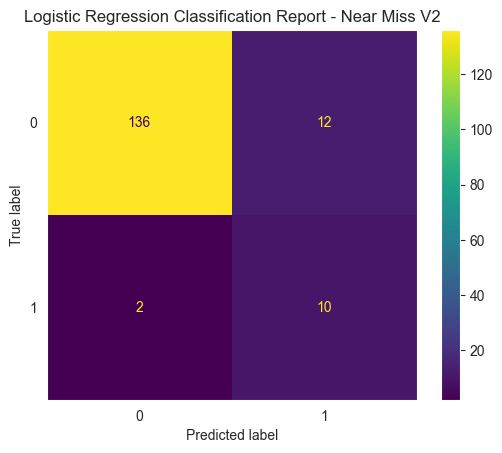

In [281]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Near Miss V2')
plt.grid(False)
plt.show()

### Near Miss - Version 3

In [282]:
near_miss_3 = NearMiss(version=3)

In [283]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [284]:
X_train_transformed

,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,...,Type 1_Steel,Type 1_Water,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,310,45,60,40,70,50,45,3
484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,300,57,24,86,24,86,23,4
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,275,45,60,45,25,45,55,5
785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,494,55,85,122,58,75,99,6
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,303,44,38,39,61,79,42,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,410,90,60,70,75,70,45,3
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,260,95,23,48,23,48,23,3
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,497,75,100,63,80,63,116,5
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,300,40,50,40,40,40,90,1


In [285]:
X_train_resampled, y_train_resampled = near_miss_3.fit_resample(X=X_train_transformed, y=y_train_numeric)

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


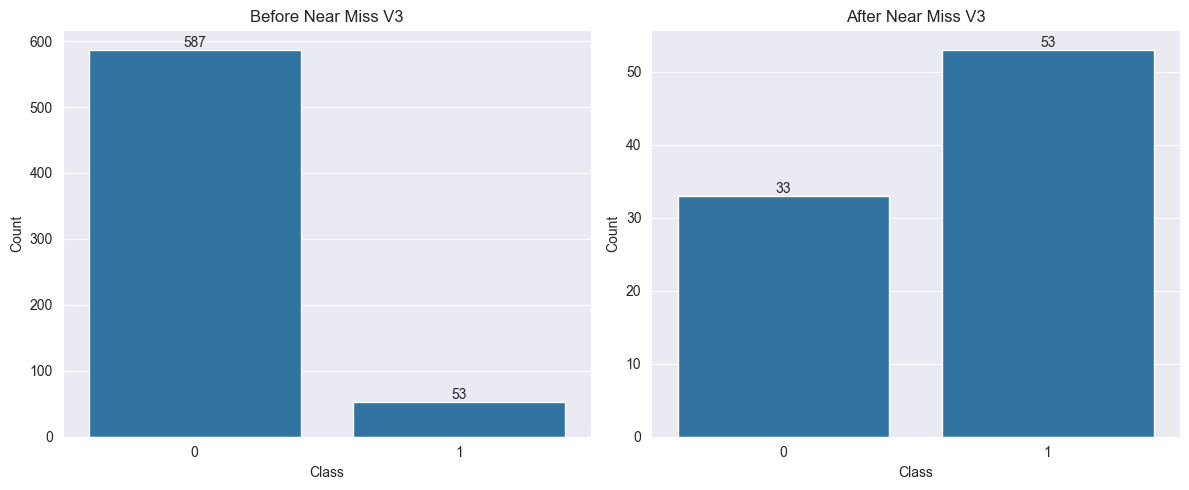

In [286]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Near Miss V3")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Near Miss V3")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using Near Miss Version 3 Undersampling

In [287]:
pca = PCA(n_components=2)

In [288]:
pipeline = create_pipeline(sampler=near_miss_3, model=pca)

In [289]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [290]:
X_pca

array([[ -24.87077863,  115.30076588],
       [ -50.51635604,  126.2755846 ],
       [-116.3243975 ,   46.74149163],
       [-144.7199919 ,   62.7423058 ],
       [-121.60579579,   41.02884644],
       [  -8.37749126,    4.24019085],
       [  10.35274194,   38.40885844],
       [   2.948516  ,   19.50269458],
       [ -89.27305447,  -11.76730584],
       [-103.67723068,   39.85675555],
       [  56.07768174,    4.95925139],
       [  26.31713703,  -34.19431054],
       [  16.91883767,   -6.24618693],
       [ -94.0833748 ,  -13.98383338],
       [  19.94154716,  -41.02911234],
       [  11.78749958,   26.03632531],
       [  21.23404849,  -25.48655455],
       [ -36.17576757,  -75.12634872],
       [ -22.44375708,  -22.69975488],
       [ -63.96872273,  -37.06076751],
       [ -18.48337765,  -19.20744616],
       [ -41.45298149,    7.10740323],
       [ -46.94746443,  -60.71107817],
       [ -20.4450058 ,   -2.96678008],
       [  85.93711253,   24.4942982 ],
       [ -23.52127623,   

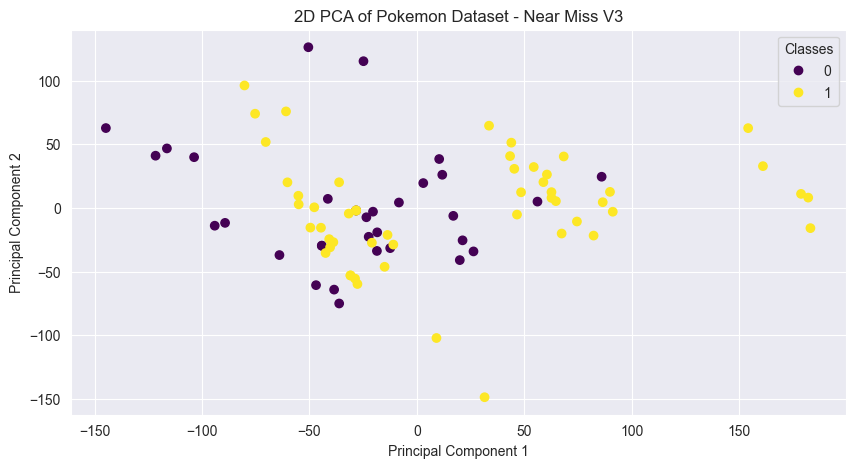

In [291]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Near Miss V3')

plt.show()

### Logistic Regression with Undersampled Dataset - Near Miss Version 3 Undersampling

In [292]:
near_miss_3 = NearMiss(version=3)

In [293]:
logistic_regression = RandomForestClassifier()

In [294]:
pipeline = create_pipeline(sampler=near_miss_3, pca=False, model=logistic_regression)

In [295]:
pipeline.fit(X=X_train, y=y_train_numeric)

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', NearMiss(version=3)),
                ('model', RandomForestClassifier())])

In [296]:
y_hat = pipeline.predict(X=X_test)

In [297]:
print(f'Logistic Regression - Near Miss V3 - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Near Miss V3 - Accuracy Score: 0.9
              precision    recall  f1-score   support

           0       0.99      0.91      0.94       148
           1       0.42      0.83      0.56        12

    accuracy                           0.90       160
   macro avg       0.70      0.87      0.75       160
weighted avg       0.94      0.90      0.91       160



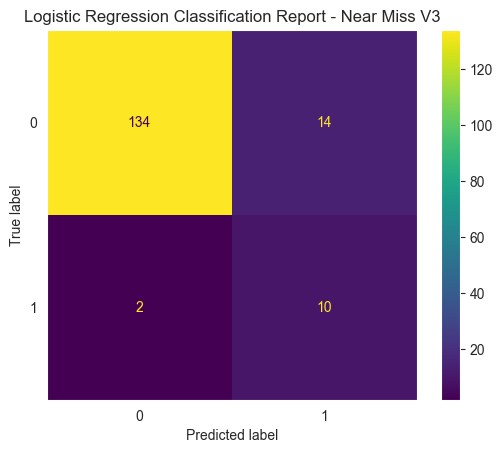

In [298]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Near Miss V3')
plt.grid(False)
plt.show()

### Tomek Links

In [299]:
tomek_links = TomekLinks()

In [300]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [301]:
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X=X_train_transformed, y=y_train_numeric)

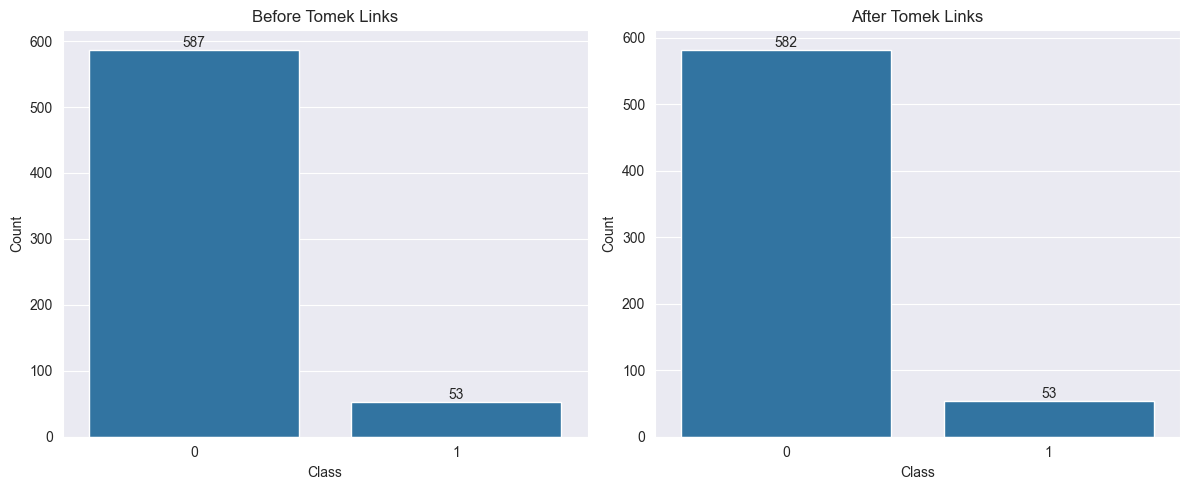

In [302]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Tomek Links")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Tomek Links")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using Tomek Links Undersampling

In [303]:
pca = PCA(n_components=2)

In [304]:
pipeline = create_pipeline(sampler=tomek_links, model=pca)

In [305]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [306]:
X_pca

array([[-129.09230407,  -15.39101128],
       [-142.97823401,   55.59376338],
       [-168.54530458,   -2.25732309],
       ...,
       [  71.30005956,  -38.63396314],
       [-142.14340608,  -31.71550258],
       [ -77.25924384,  -14.66502841]], shape=(635, 2))

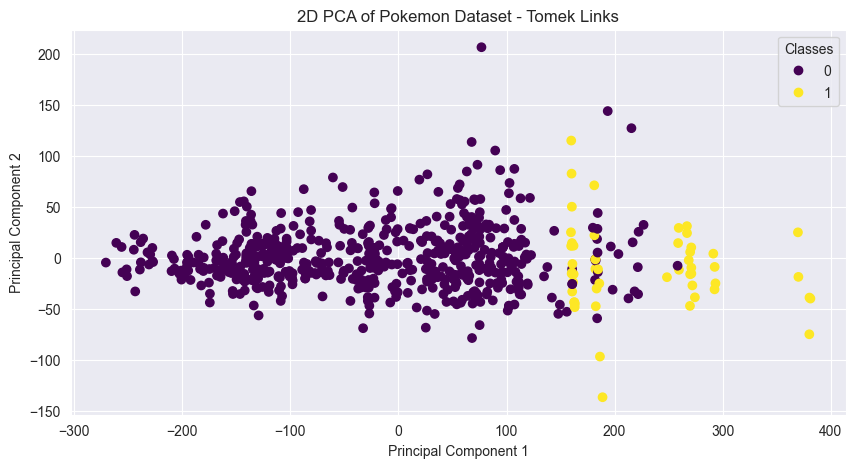

In [307]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Tomek Links')

plt.show()

### Logistic Regression with Undersampled Dataset - Tomek Links Undersampling

In [308]:
tomek_links = TomekLinks()

In [309]:
logistic_regression = RandomForestClassifier()

In [310]:
pipeline = create_pipeline(sampler=tomek_links, pca=False, model=logistic_regression)

In [311]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', TomekLinks()),
                ('model', RandomForestClassifier())])

In [312]:
y_hat = pipeline.predict(X=X_test)

In [313]:
print(f'Logistic Regression - Tomek Links - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Tomek Links - Accuracy Score: 0.9125
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       148
           1       0.44      0.67      0.53        12

    accuracy                           0.91       160
   macro avg       0.71      0.80      0.74       160
weighted avg       0.93      0.91      0.92       160



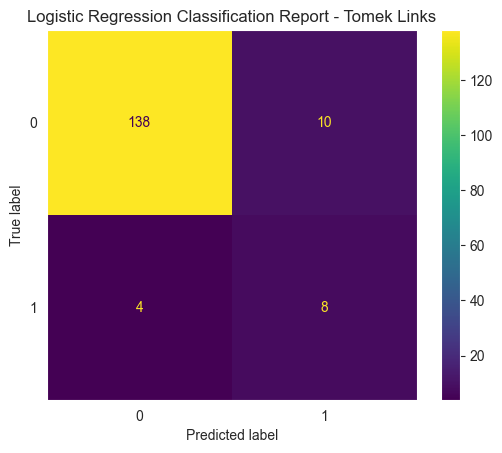

In [314]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Tomek Links')
plt.grid(False)
plt.show()

### Clustering Centroids

In [315]:
cluster_centroids = ClusterCentroids()

In [316]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [317]:
X_train_resampled, y_train_resampled = cluster_centroids.fit_resample(X=X_train_transformed, y=y_train_numeric)

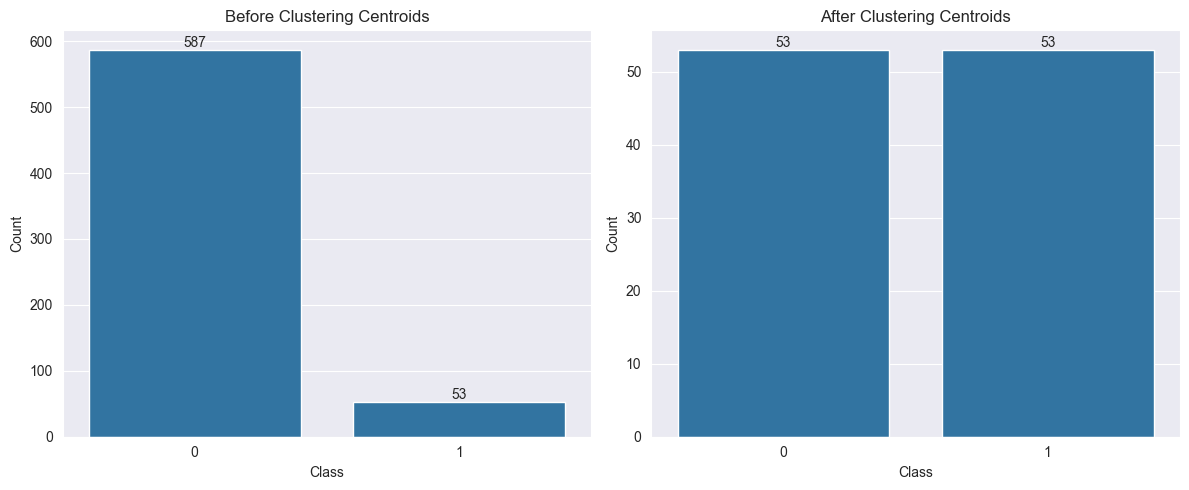

In [318]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Clustering Centroids")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Clustering Centroids")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using Clustering Centroids Undersampling

In [319]:
pca = PCA(n_components=2)

In [320]:
pipeline = create_pipeline(sampler=cluster_centroids, model=pca)

In [321]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [322]:
X_pca

array([[ 8.44485727e+01, -2.88443216e+01],
       [-2.67228998e+02,  5.38892896e+00],
       [-7.82070027e+01,  2.12835763e+01],
       [-2.37633332e+02, -8.22548512e+00],
       [-3.67791992e+02, -3.35558937e+01],
       [-1.84259999e+01, -1.66124881e+01],
       [-6.53147631e+01, -3.59639488e+01],
       [-1.94304915e+02, -2.84544148e+01],
       [-2.85000077e+02, -1.73828450e+01],
       [-3.96922883e+01,  1.91981071e+01],
       [-1.05070720e+01, -1.97046792e+01],
       [-1.45168971e+02, -4.07131347e+01],
       [-1.45420489e+02, -1.19529225e+01],
       [-5.74176772e+01, -1.97919525e+01],
       [ 7.58918456e+01,  1.16148390e+02],
       [-2.40117752e+02, -2.92265522e+01],
       [-8.44252434e+01,  3.57449499e+01],
       [-6.88828702e+01, -1.86010614e+01],
       [-1.90084845e+02, -1.14012329e+01],
       [-1.62176465e+02,  3.79751018e+00],
       [ 1.27695155e+02,  4.40843520e+00],
       [-9.21997845e+01,  1.21492362e+00],
       [-5.59020523e+01,  2.40358824e+02],
       [-3.

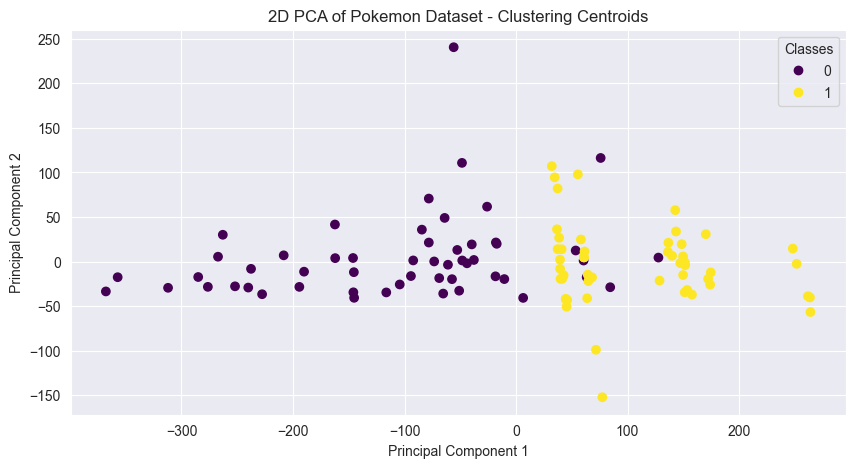

In [323]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Clustering Centroids')

plt.show()

#### Logistic Regression with Undersampled Dataset - Clustering Centroids Undersampling

In [324]:
cluster_centroids = ClusterCentroids()

In [325]:
logistic_regression = RandomForestClassifier()

In [326]:
pipeline = create_pipeline(sampler=cluster_centroids, pca=False, model=logistic_regression)

In [327]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', ClusterCentroids()),
                ('model', RandomForestClassifier())])

In [328]:
y_hat = pipeline.predict(X=X_test)

In [329]:
print(f'Logistic Regression - Clustering Centroids - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Clustering Centroids - Accuracy Score: 0.86875
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       148
           1       0.36      1.00      0.53        12

    accuracy                           0.87       160
   macro avg       0.68      0.93      0.73       160
weighted avg       0.95      0.87      0.89       160



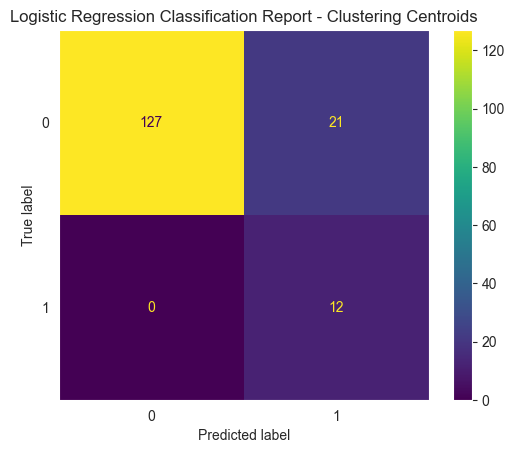

In [330]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Clustering Centroids')
plt.grid(False)
plt.show()

# Oversampling
Oversampling is a technique that works backward to undersampling. Instead of reducing the size of the majority class, we are generating new samples for the minority class using
different algorithms.

Examples:
1. **Random Oversampling**. It generates new samples in the classes which are underrepresented. The naivest strategy is to generate new samples by randomly sampling with
replacement the current available samples.
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_002.png"
        alt="Picture"
        width="600"
        height="600"
        style="display: block; margin: 0 auto" />

2. **SMOTE** - Synthetic Minority Oversampling Technique. It works by creating synthetic samples for the minority class. It does this by selecting a minority class instance and its k
nearest neighbors. It then generates synthetic examples by interpolating between the selected instance and its neighbors. It follows the next steps:
    1. **Selecting Data Points**: SMOTE starts by selecting a minority class instance $X_1$ from the dataset.
    2. **Selecting Nearest Neighbors**: SMOTE then selects $K$ nearest neighbors (data points from the minority class) of point $X_1$. The value of $K$ is a user-defined parameter.
    3. **Generating Synthetic Samples**: For each of the k nearest neighbors, SMOTE generates synthetic samples by linearly interpolating between point A and the selected neighbor. This
    is done using the following formula:
$$
\begin{gather*}
X^{\prime} = X_1 + \lambda \times \Delta(X_1,X_{nn}) \\
X^{\prime} \text{ - new minority class point} \\
X_1 \text{ - selected minority class point} \\
X_{nn} \text{ - selected nearest minority class neighbor point} \\
\lambda \text{ - random coefficient} \in (0, 1]
\end{gather*}
$$
     4. **Repeat**: Steps 1–3 are repeated for multiple minority class instances, creating a set of synthetic samples.
<img src="https://i0.wp.com/varshasaini.in/wp-content/uploads/2022/07/smote.jpeg?w=1400&ssl=1"
        alt="Picture"
        width="600"
        height="600"
        style="display: block; margin: 0 auto" />
3. **ADASYN** - Adaptive Synthetic sampling method. It builds upon the concept of SMOTE but takes an adaptive approach to address the imbalance problem more effectively. It focuses on the minority instances that are difficult to classify correctly, rather than oversampling all minority instances uniformly. It assigns a different weight to each minority instance based on its level of difficulty in classification. It follows the next steps:
    1. **Ratio of minority**: Calculate the ratio of minority to majority examples using:
$$
\begin{gather*}
d = \frac{m_s}{m_l} \\
X^{\prime} \text{ - new minority class point} \\
m_s \text{ - number of minority class samples} \\
m_l \text{ - number of majority class samples}
\end{gather*}
$$
    2. **Number of synthetic points to be generated**: Calculate the number of synthetic data examples that need to be generated for the minority class:
$$
\begin{gather*}
G = \left( m_l - m_s \right) \times \beta \\
\beta \text{ - parameter used to specify the desired balanced level after the generation of synthetic data}
\end{gather*}
$$
    3. **K-Nearest Neighbors**: Find the k-Nearest Neighbors of each minority example and calculate the $r_i$ value. After this step, each minority example should be associated with a different neighborhood. The $r_i$ value indicates the dominance of the majority class in each neighborhood. Higher $r_i$ neighborhoods contain more majority class examples and are more difficult to learn:
$$
\begin{gather*}
r_i = \frac{\Delta i}{K}, i=1,...,m_s \\
\Delta i \text{ - number of examples in the $K$ nearest neighbors that belong to majority class}
\end{gather*}
$$
    4. **Normalization**: Normalize the $r_i$ values so that the sum of all $r_i$ values equals to 1:
$$
\begin{gather*}
\hat{r}_i = \frac{r_i}{\sum\limits_{i=1}^{m_s} r_i}
\end{gather*}
$$
    5. **Amount of Synthetic Examples to be generated**: Calculate the amount of synthetic examples to generate per neighborhood:
$$
\begin{gather*}
g_i = \hat{r}_i \times G \\
G \text{ - total number of synthetic data examples that need to be generated for the minority class}
\end{gather*}
$$
    6. **Generate Synthetic points**: Generate $G_i$ data for each neighborhood. First, take the minority example for the neighborhood, $x_i$. Then, randomly select another minority
    example within that neighborhood, $x_{zi}$. The new synthetic example can be calculated using:
$$
\begin{gather*}
s_i = x_i + (x_{zi} - x_i) \times \lambda \\
(x_{zi} - x_i) \text{ - the difference vector in $n$ dimensional spaces} \\
\lambda \text{ - random number} \in [0, 1] \\
\end{gather*}
$$
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_004.png"
        alt="Picture"
        width="400"
        height="600"
        style="display: block; margin: 0 auto" />
4. **Variations of SMOTE** - SMOTEENN, SMOTE-Tomek, Borderline SMOTE, etc.

### Random Oversampling

In [331]:
random_over_sampler = RandomOverSampler(random_state=42)

In [332]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [333]:
X_train_resampled, y_train_resampled = random_over_sampler.fit_resample(X=X_train_transformed, y=y_train_numeric)

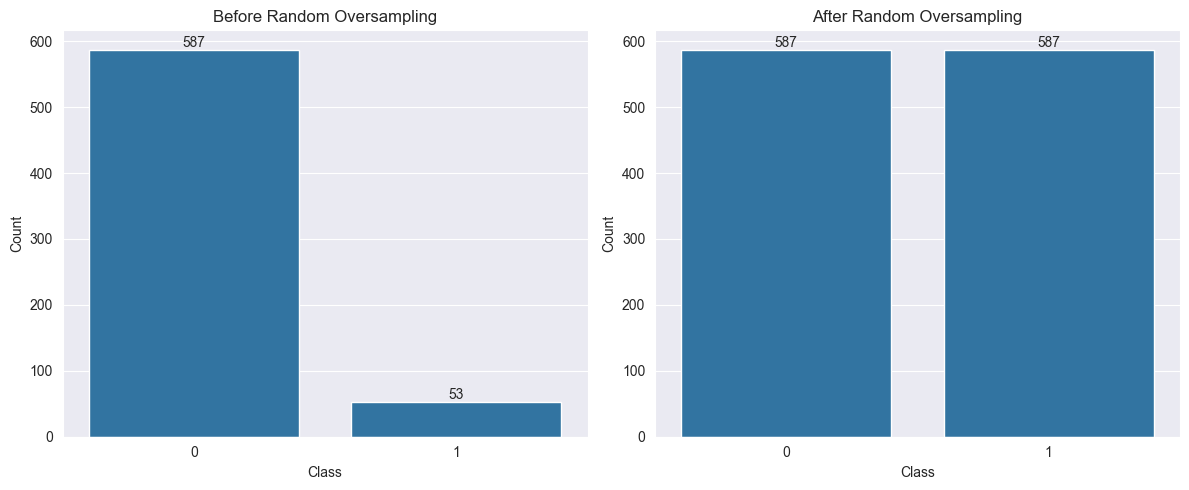

In [334]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before Random Oversampling")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After Random Oversampling")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Oversampled Dataset using Random Oversampling

In [335]:
pca = PCA(n_components=2)

In [336]:
pipeline = create_pipeline(sampler=random_over_sampler, model=pca)

In [337]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [338]:
X_pca

array([[-228.0369177 ,  -23.3740678 ],
       [-245.43466928,   60.12119798],
       [-269.16226464,  -10.56075353],
       ...,
       [ 156.77772367,   21.216109  ],
       [  94.27441431, -154.44713731],
       [ 164.09800127,   65.88353882]], shape=(1174, 2))

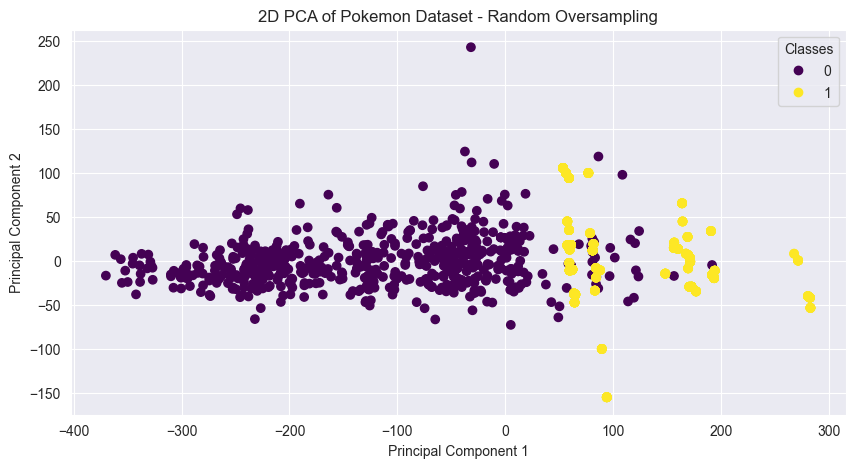

In [339]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - Random Oversampling')

plt.show()

#### Logistic Regression with Oversampled Dataset - Random Oversampling

In [340]:
random_over_sampler = RandomOverSampler(random_state=42)

In [341]:
logistic_regression = RandomForestClassifier()

In [342]:
pipeline = create_pipeline(sampler=random_over_sampler, pca=False, model=logistic_regression)

In [343]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', RandomOverSampler(random_state=42)),
                ('model', RandomForestClassifier())])

In [344]:
y_hat = pipeline.predict(X=X_test)

In [345]:
print(f'Logistic Regression - Random Oversampling - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - Random Oversampling - Accuracy Score: 0.91875
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       148
           1       0.47      0.67      0.55        12

    accuracy                           0.92       160
   macro avg       0.72      0.80      0.75       160
weighted avg       0.93      0.92      0.93       160



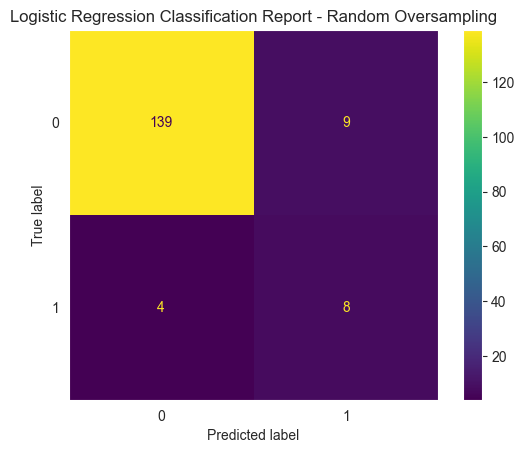

In [346]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - Random Oversampling')
plt.grid(False)
plt.show()

### SMOTE

In [347]:
smote = SMOTE(random_state=42)

In [348]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [349]:
X_train_resampled, y_train_resampled = smote.fit_resample(X=X_train_transformed, y=y_train_numeric)

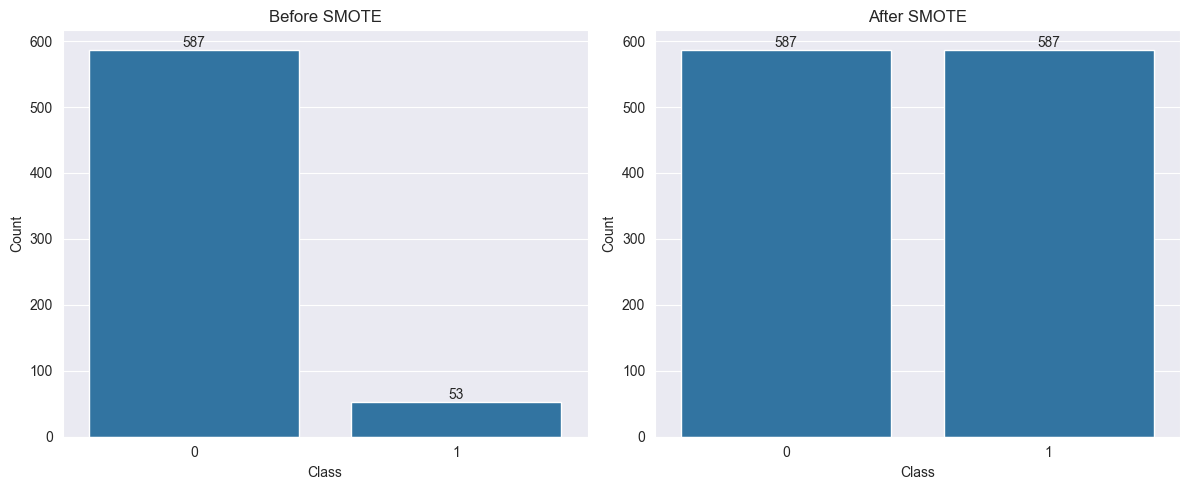

In [350]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Oversampled Dataset using SMOTE

In [351]:
pca = PCA(n_components=2)

In [352]:
pipeline = create_pipeline(sampler=smote, model=pca)

In [353]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [354]:
X_pca

array([[-231.56394683,  -23.23942787],
       [-248.57351224,   60.11503775],
       [-272.64543917,   -9.10116187],
       ...,
       [ 179.37218129,  -15.5109044 ],
       [ 167.01188255,  -28.06011187],
       [  64.65024738,   -1.16060184]], shape=(1174, 2))

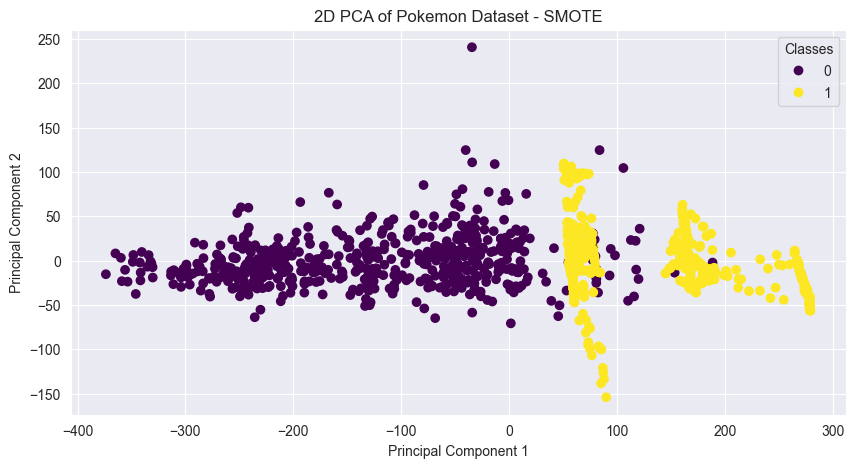

In [355]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - SMOTE')

plt.show()

#### Logistic Regression with Oversampled Dataset using SMOTE

In [356]:
smote = SMOTE(random_state=42)

In [357]:
logistic_regression = RandomForestClassifier()

In [358]:
pipeline = create_pipeline(sampler=smote, pca=False, model=logistic_regression)

In [359]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(random_state=42)),
                ('model', RandomForestClassifier())])

In [360]:
y_hat = pipeline.predict(X=X_test)

In [361]:
print(f'Logistic Regression - SMOTE - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - SMOTE - Accuracy Score: 0.89375
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       148
           1       0.37      0.58      0.45        12

    accuracy                           0.89       160
   macro avg       0.67      0.75      0.70       160
weighted avg       0.92      0.89      0.90       160



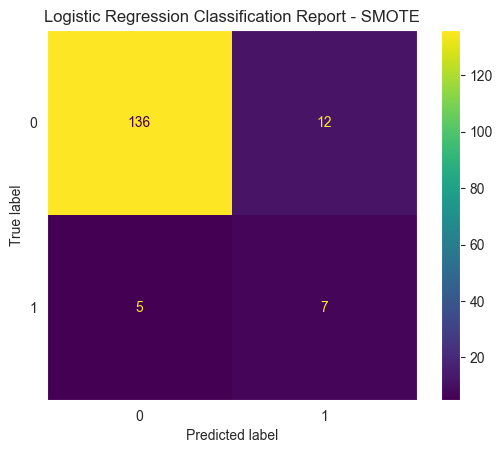

In [362]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - SMOTE')
plt.grid(False)
plt.show()

### ADASYN

In [363]:
adasyn = ADASYN(random_state=42)

In [364]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [365]:
X_train_resampled, y_train_resampled = adasyn.fit_resample(X=X_train_transformed, y=y_train_numeric)

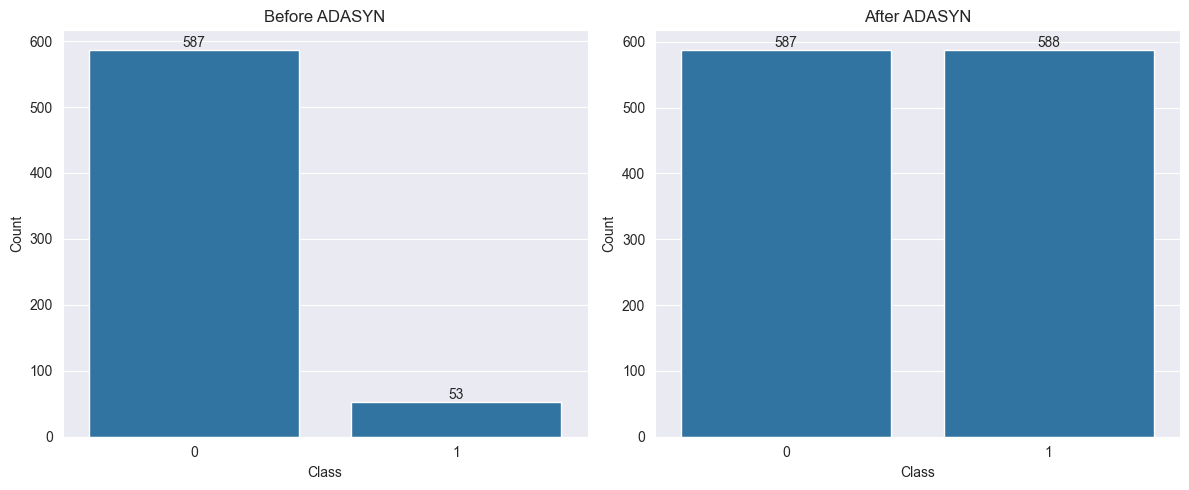

In [366]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before ADASYN")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After ADASYN")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using ADASYN

In [367]:
pca = PCA(n_components=2)

In [368]:
pipeline = create_pipeline(sampler=adasyn, model=pca)

In [369]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [370]:
X_pca

array([[-214.64512785,  -20.1372217 ],
       [-230.05048935,   62.96832405],
       [-254.1293336 ,   -6.35722149],
       ...,
       [  84.79542038,  -78.09515778],
       [ 102.88921091, -146.69577793],
       [  87.50879588,  -85.77829381]], shape=(1175, 2))

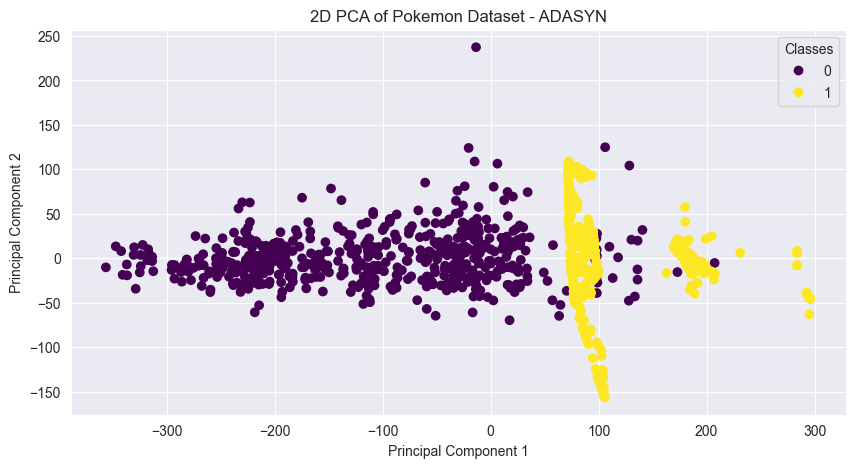

In [371]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - ADASYN')

plt.show()

#### Logistic Regression with Oversampled Dataset - ADASYN

In [372]:
adasyn = ADASYN(random_state=42)

In [373]:
logistic_regression = RandomForestClassifier()

In [374]:
pipeline = create_pipeline(sampler=adasyn, pca=False, model=logistic_regression)

In [375]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', ADASYN(random_state=42)),
                ('model', RandomForestClassifier())])

In [376]:
y_hat = pipeline.predict(X=X_test)

In [377]:
print(f'Logistic Regression - ADASYN - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - ADASYN - Accuracy Score: 0.9
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       148
           1       0.39      0.58      0.47        12

    accuracy                           0.90       160
   macro avg       0.68      0.75      0.71       160
weighted avg       0.92      0.90      0.91       160



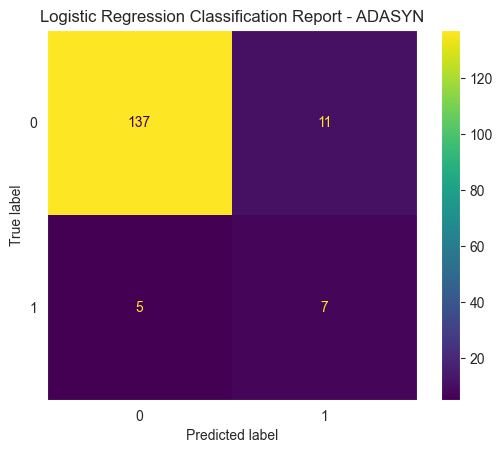

In [378]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - ADASYN')
plt.grid(False)
plt.show()

### SMOTEENN

In [379]:
smoteenn = SMOTEENN(random_state=42)

In [380]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [381]:
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X=X_train_transformed, y=y_train_numeric)

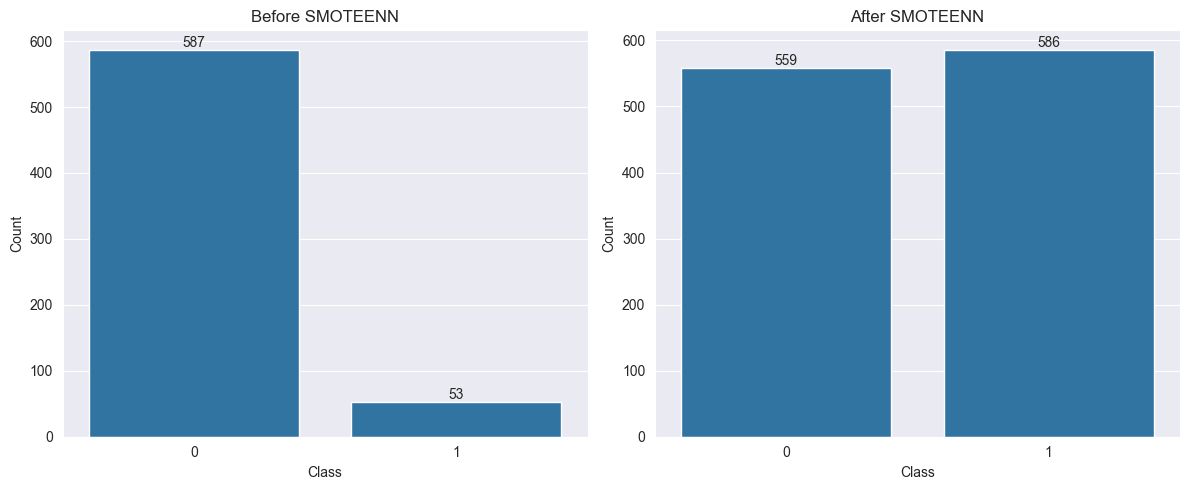

In [382]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before SMOTEENN")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After SMOTEENN")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using SMOTEENN

In [383]:
pca = PCA(n_components=2)

In [384]:
pipeline = create_pipeline(sampler=smoteenn, model=pca)

In [385]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [386]:
X_pca

array([[-229.30688562,  -23.03730833],
       [-246.32074499,   60.49233581],
       [-270.43912244,   -9.36911282],
       ...,
       [ 181.62940614,  -15.40322293],
       [ 169.28175388,  -27.52223307],
       [  66.85952727,   -1.4340497 ]], shape=(1145, 2))

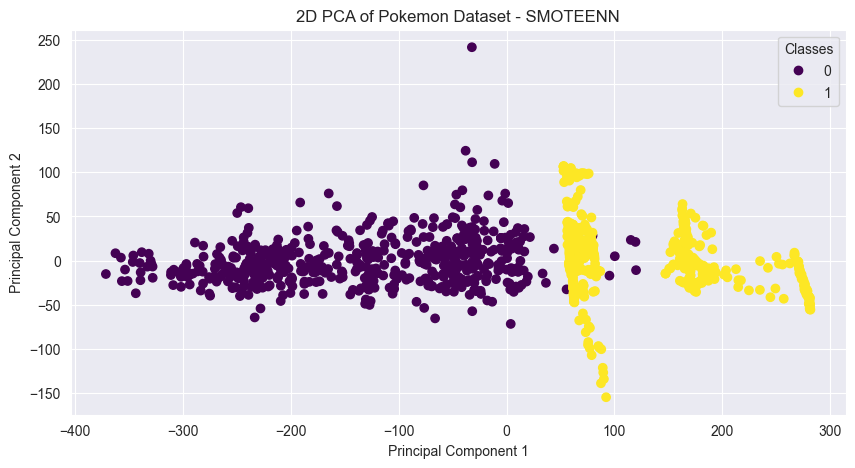

In [387]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - SMOTEENN')

plt.show()

#### Logistic Regression with Oversampled Dataset - SMOTEENN

In [388]:
smoteenn = SMOTEENN(random_state=42)

In [389]:
logistic_regression = RandomForestClassifier()

In [390]:
pipeline = create_pipeline(sampler=smoteenn, pca=False, model=logistic_regression)

In [391]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTEENN(random_state=42)),
                ('model', RandomForestClassifier())])

In [392]:
y_hat = pipeline.predict(X=X_test)

In [393]:
print(f'Logistic Regression - SMOTEENN - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - SMOTEENN - Accuracy Score: 0.89375
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       148
           1       0.41      0.92      0.56        12

    accuracy                           0.89       160
   macro avg       0.70      0.90      0.75       160
weighted avg       0.95      0.89      0.91       160



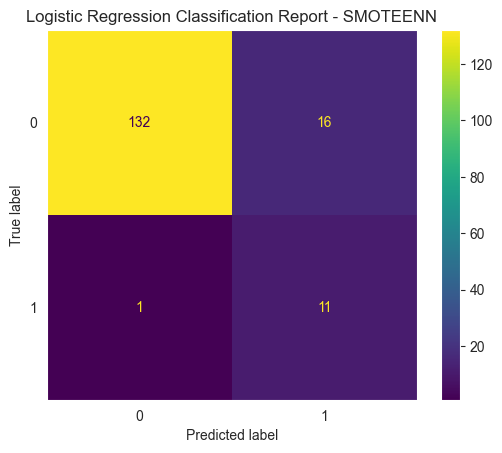

In [394]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - SMOTEENN')
plt.grid(False)
plt.show()

### SMOTE-Tomek

In [395]:
smotetomek = SMOTETomek(random_state=42)

In [396]:
transformer_pipeline = create_pipeline()
X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train_numeric)
X_test_transformed = transformer_pipeline.transform(X=X_test)

In [397]:
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X=X_train_transformed, y=y_train_numeric)

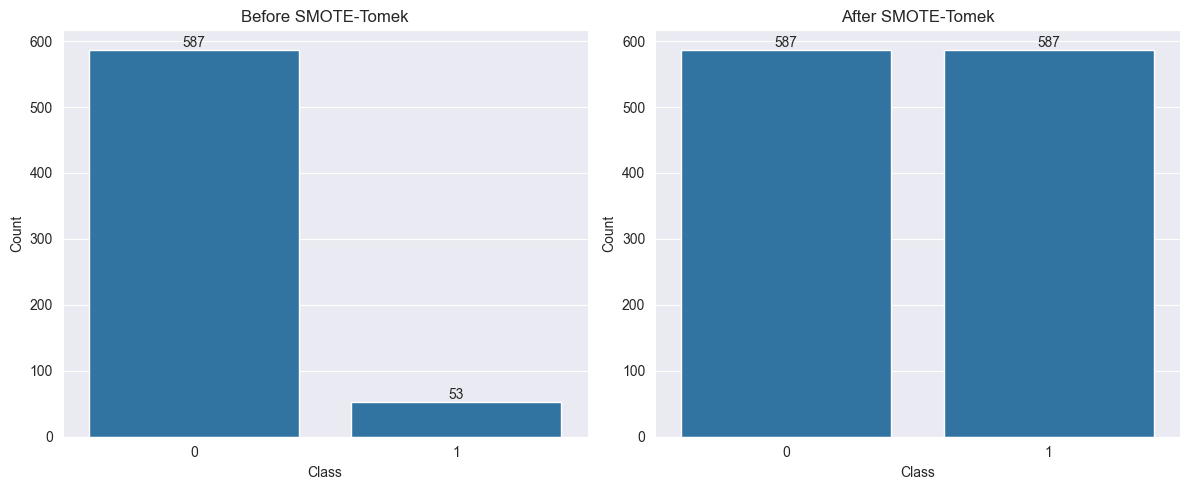

In [398]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=y_train_numeric, ax=axes[0])
axes[0].set_title("Before SMOTE-Tomek")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After SMOTE-Tomek")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

#### Visualization - Undersampled Dataset using SMOTE-Tomek

In [399]:
pca = PCA(n_components=2)

In [400]:
pipeline = create_pipeline(sampler=smotetomek, model=pca)

In [401]:
X_pca = pipeline.fit_transform(X=X_train, y=y_train_numeric)

In [402]:
X_pca

array([[-231.56394683,  -23.23942787],
       [-248.57351224,   60.11503775],
       [-272.64543917,   -9.10116187],
       ...,
       [ 179.37218129,  -15.5109044 ],
       [ 167.01188255,  -28.06011187],
       [  64.65024738,   -1.16060184]], shape=(1174, 2))

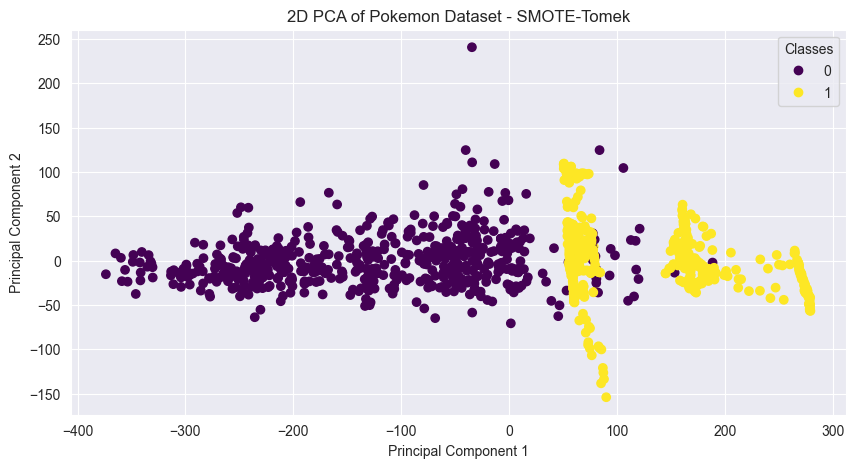

In [403]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='viridis', label=y_train_resampled)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Pokemon Dataset - SMOTE-Tomek')

plt.show()

#### Logistic Regression with Oversampled Dataset - SMOTE-Tomek

In [404]:
smotetomek = SMOTETomek(random_state=42)

In [405]:
logistic_regression = RandomForestClassifier()

In [406]:
pipeline = create_pipeline(sampler=smotetomek, pca=False, model=logistic_regression)

In [407]:
pipeline.fit(X=X_train, y=y_train_numeric)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['#', 'Name']),
                                                 ('impute_and_encode_Type_2_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encode_type_1_multiclass',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['Type 2']),
                                                 ('one_hot_encode_type_2_multiclass',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['Type 1'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTETomek(random_state=42)),
                ('model', RandomForestClassifier())])

In [408]:
y_hat = pipeline.predict(X=X_test)

In [409]:
print(f'Logistic Regression - SMOTE-Tomek - Accuracy Score: {accuracy_score(y_true=y_test_numeric, y_pred=y_hat)}')
print(classification_report(y_true=y_test_numeric, y_pred=y_hat))

Logistic Regression - SMOTE-Tomek - Accuracy Score: 0.89375
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       148
           1       0.37      0.58      0.45        12

    accuracy                           0.89       160
   macro avg       0.67      0.75      0.70       160
weighted avg       0.92      0.89      0.90       160



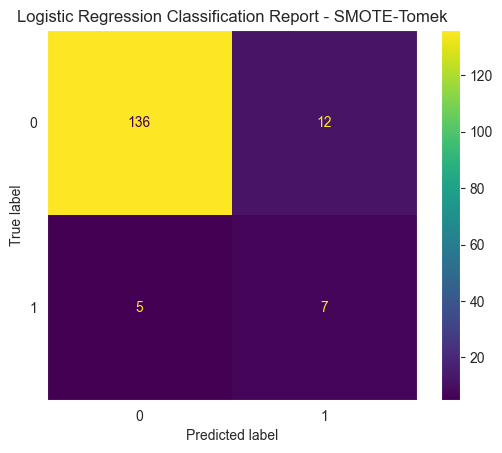

In [410]:
cm = confusion_matrix(y_test_numeric, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report - SMOTE-Tomek')
plt.grid(False)
plt.show()